In [1]:
from model import wrn_28_2
import torch
from tqdm import tqdm
import torch.nn.functional as F
from ema import EMA,EMADriver, set_ema_model

/opt/conda/envs/usb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
m = wrn_28_2(pretrained=False,pretrained_path=None ,num_classes=10)
m.to('cuda')

WideResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block1): NetworkBlock(
    (layer): Sequential(
      (0): BasicBlock(
        (bn1): BatchNorm2d(16, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (relu1): LeakyReLU(negative_slope=0.1)
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(32, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (relu2): LeakyReLU(negative_slope=0.1)
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (convShortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): BasicBlock(
        (bn1): BatchNorm2d(32, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (relu1): LeakyReLU(negative_slope=0.1)
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(32, eps=0.001, momentum=0

In [3]:
# for ind,x in enumerate(m.children()):
#     print(ind,x)

In [4]:
# !pip install torch

In [5]:
from semilearn import get_dataset, get_data_loader, get_net_builder, get_algorithm, get_config, Trainer

In [6]:
# config = {
#     'algorithm': 'fixmatch',
#     'net': 'wrn_28_2',
#     'use_pretrain': False,  # todo: add pretrain
#     'pretrain_path': None,

#     # optimization configs
#     'epoch': 3,
#     'num_train_iter': 150,
#     'num_eval_iter': 50,
#     'optim': 'SGD',
#     'lr': 0.03,
#     'momentum': 0.9,
#     'batch_size': 32,
#     'eval_batch_size': 64,

#     # dataset configs
#     'dataset': 'cifar10',
#     'num_labels': 40,
#     'num_classes': 10,
#     'img_size': 32,
#     'crop_ratio': 0.875,
#     'data_dir': './data',

#     # algorithm specific configs
#     'hard_label': True,
#     'uratio': 3,
#     'ulb_loss_ratio': 1.0,

#     # device configs
#     'gpu': 0,
#     'world_size': 1,
#     'distributed': False,
# }
# config = get_config(config)

In [7]:
# vars(config)

In [8]:
# dataset_dict = get_dataset(config, config.algorithm, config.dataset, config.num_labels, config.num_classes, data_dir=config.data_dir)
# train_lb_loader = get_data_loader(config, dataset_dict['train_lb'], config.batch_size)

In [9]:
from semilearn.datasets.cv_datasets import get_cifar
import argparse

In [10]:
ema = wrn_28_2(pretrained=False,pretrained_path=None ,num_classes=10)

In [11]:
ema = set_ema_model(ema, m)
emaA = EMADriver(model=m,ema_model=ema,ema_m=0.999)
emaA.before_run()

In [12]:
args_d = {'dataset': 'cifar10',
         'num_classes': 10,
         'train_sampler': 'RandomSampler',
         'num_workers': 1,
         'lb_imb_ratio': 1,
         'ulb_imb_ratio': 1,
          'batch_size': 1,
         'ulb_num_labels': None,
         'img_size': 32,
         'crop_ratio': 0.875,
         'num_labels': 40,
         'seed': 1,
         'epoch': 3,
         'num_train_iter':150,
         'net': 'wrn_28_8',
         'optim': 'SGD',
         'lr': 0.03,
         'momentum': 0.9,
         'weight_decay': 0.0005,
         'layer_decay': 0.75,
          'num_warmup_iter': 0,
         'algorithm': 'fixmatch',
         'data_dir': './data',
         'uratio': 3,
         'eval_batch_size': 64}

parser = argparse.ArgumentParser(description='Semi-Supervised Learning (USB semilearn package)')
args = parser.parse_args("")
# args
for k in args_d:
        setattr(args, k, args_d[k])
lb_dset, ulb_dset, eval_dset = get_cifar(args,
          alg=None, 
          name='cifar10',
          num_labels=400,
          num_classes=10,
          data_dir='./data',
          include_lb_to_ulb=True)

Files already downloaded and verified
lb count: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
ulb count: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
Files already downloaded and verified


In [13]:
dataset_dict = get_dataset(args, args.algorithm, args.dataset, args.num_labels, args.num_classes, data_dir=args.data_dir)
train_lb_loader = get_data_loader(args, dataset_dict['train_lb'], args.batch_size)

Files already downloaded and verified
lb count: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
ulb count: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
Files already downloaded and verified


In [14]:
lb_dset[0]

{'idx_lb': 0,
 'x_lb': tensor([[[ 0.1597,  0.1597,  0.0227,  ...,  0.4337,  0.4851,  0.5022],
          [ 0.0398,  0.0741,  0.0741,  ...,  0.3823,  0.4166,  0.4166],
          [ 0.1597,  0.0741,  0.0569,  ...,  0.1426,  0.1939,  0.3652],
          ...,
          [-0.5938, -0.6623, -0.7308,  ..., -0.6109, -0.7650, -0.8849],
          [-1.0733, -1.0219, -1.0390,  ..., -0.4397, -0.5424, -0.7650],
          [-0.8507, -0.8507, -0.8507,  ..., -0.5596, -0.5938, -0.6281]],
 
         [[ 0.6429,  0.6429,  0.5028,  ...,  0.9230,  0.9405,  0.9755],
          [ 0.5203,  0.5553,  0.5378,  ...,  0.9055,  0.9230,  0.9230],
          [ 0.6078,  0.5553,  0.5553,  ...,  0.6954,  0.7129,  0.8880],
          ...,
          [-0.3025, -0.3375, -0.3725,  ..., -0.2850, -0.4426, -0.5126],
          [-0.5651, -0.4776, -0.4951,  ..., -0.1099, -0.1450, -0.2850],
          [-0.3550, -0.3550, -0.3550,  ..., -0.1625, -0.1450, -0.1800]],
 
         [[ 1.0714,  1.0539,  0.9842,  ...,  1.3328,  1.3677,  1.3851],
      

In [15]:
train_lb_loader = get_data_loader(args, dataset_dict['train_lb'], args.batch_size)
train_ulb_loader = get_data_loader(args, dataset_dict['train_ulb'], int(args.batch_size * args.uratio))
eval_loader = get_data_loader(args, dataset_dict['eval'], args.eval_batch_size)

In [16]:
for x in train_lb_loader:
    print(x.keys())
    break

dict_keys(['idx_lb', 'x_lb', 'y_lb'])


In [17]:
for data_lb, data_ulb in zip(train_lb_loader, train_ulb_loader):
    print(data_lb.keys(),data_ulb.keys())
    break

dict_keys(['idx_lb', 'x_lb', 'y_lb']) dict_keys(['idx_ulb', 'x_ulb_w', 'x_ulb_s'])


In [18]:
from semilearn.core.utils import get_dataset, get_data_loader, get_optimizer, get_cosine_schedule_with_warmup

In [19]:
optimizer = get_optimizer(m, args.optim, args.lr, args.momentum, args.weight_decay, args.layer_decay)
scheduler = get_cosine_schedule_with_warmup(optimizer,
                                            args.num_train_iter,
                                            num_warmup_steps=args.num_warmup_iter)

In [20]:
## Train

In [21]:
# torch.device('cuda')

In [22]:
# data_lb['x_lb'].shape

In [23]:
# !export CUDA_LAUNCH_BLOCKING=1

In [24]:
device = torch.device('cuda:0')
print(device)


cuda:0


In [25]:
loss_ce = torch.nn.CrossEntropyLoss()

In [28]:

# m.to(device)
# ema.to(device)
m.train()
ema.train()
def trainer(train_lb_loader, train_ulb_loader,m,epochs=10):
    losses = []
    steps = []
    total_steps = 0
    for _ in tqdm(range(100)):
        for ind,(data_lb, data_ulb) in enumerate(zip(train_lb_loader, train_ulb_loader)):
            x = data_lb['x_lb'].to(device)
            y = data_lb['y_lb'].to(device)
            optimizer.zero_grad()

            out = m(x)
            out = out['logits']
            loss = loss_ce(out,y)

            loss.backward()
            optimizer.step()
            scheduler.step()
            if total_steps%10==0:
                with torch.no_grad():
                    losses.append(loss.item())
                    steps.append(total_steps)
                    # print(loss.item())
            total_steps+=1
            emaA.after_train_step()
    return steps,losses

steps,losses=trainer(train_lb_loader, train_ulb_loader,m,epochs=10)
    

100%|██████████| 100/100 [04:43<00:00,  2.84s/it]


In [29]:
# !python -m torch.utils.collect_env

In [30]:
import matplotlib.pyplot as plt

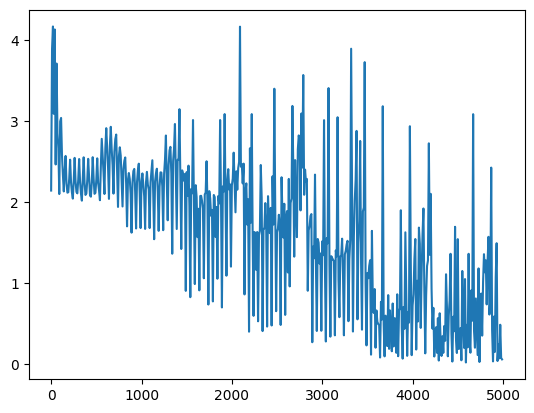

In [31]:
plt.plot(steps,losses)

In [32]:
def predict(model,ema,data_loader,device, use_ema_model=False, return_gt=False):
        model.to(device)
        model.eval()

        if use_ema_model:
            ema.apply_shadow()

        y_true = []
        y_pred = []
        y_logits = []
        total_loss = 0.0
        total_num = 0.0
        with torch.no_grad():
            for data in tqdm(data_loader,total=len(data_loader)):
                x = data['x_lb']
                y = data['y_lb']
                num_batch = y.shape[0]
                total_num += num_batch
                if isinstance(x, dict):
                    x = {k: v.cuda(device) for k, v in x.items()}
                else:
                    x = x.cuda(device)
                y = y.cuda(device)

                logits = model(x)['logits']
                loss = F.cross_entropy(logits, y, reduction='mean')
                y_true.extend(y.cpu().tolist())
                y_pred.extend(torch.max(logits, dim=-1)[1].cpu().tolist())
                y_logits.append(torch.softmax(logits, dim=-1).cpu().numpy())
                total_loss += loss.item() * num_batch
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        y_logits = np.concatenate(y_logits)
        total_loss /= total_num
        if use_ema_model:
            ema.restore()
        model.train()
        
        if return_gt:
            return y_pred, y_logits, y_true, total_loss
        else:
            return y_pred, y_logits, total_loss

In [33]:
print(device)

cuda:0


In [34]:
import numpy as np

In [35]:
y_pred, y_logits, y_true, total_loss = predict(m,emaA.ema,eval_loader,device,return_gt=True,use_ema_model=False)

100%|██████████| 50/50 [00:02<00:00, 23.68it/s]


In [38]:
## Metrics

In [39]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [40]:
# y_true = data_lb['y_lb']
# y_pred = data_lb['y_lb']
print(total_loss)
top1 = accuracy_score(y_true, y_pred)
balanced_top1 = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
F1 = f1_score(y_true, y_pred, average='macro')
cf_mat = confusion_matrix(y_true, y_pred, normalize='true')

40.09900234222412


In [41]:
top1,balanced_top1, precision, recall, F1, cf_mat

(0.0834375,
 0.08483787662315159,
 0.06651175904449783,
 0.08483787662315159,
 0.034964838787514205,
 array([[0.        , 0.00638978, 0.83386581, 0.00319489, 0.1086262 ,
         0.01916933, 0.        , 0.01916933, 0.        , 0.00958466],
        [0.        , 0.        , 0.9969419 , 0.        , 0.0030581 ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.08571429, 0.00952381, 0.69206349, 0.00952381, 0.03809524,
         0.13968254, 0.        , 0.01587302, 0.        , 0.00952381],
        [0.03625378, 0.00302115, 0.82477341, 0.00906344, 0.02719033,
         0.07250755, 0.        , 0.00906344, 0.00906344, 0.00906344],
        [0.10491803, 0.04918033, 0.55409836, 0.01311475, 0.01967213,
         0.19344262, 0.        , 0.04262295, 0.00655738, 0.01639344],
        [0.01916933, 0.        , 0.7827476 , 0.00319489, 0.05111821,
         0.11821086, 0.        , 0.02236422, 0.00319489, 0.        ],
        [0.11858974, 0.00961538, 0.70192308, 0.00320513, 0.003205

In [42]:
# EMA

In [43]:
y_pred, y_logits, y_true, total_loss = predict(m,emaA.ema,eval_loader,device,return_gt=True,use_ema_model=True)
print(total_loss)
top1 = accuracy_score(y_true, y_pred)
balanced_top1 = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
F1 = f1_score(y_true, y_pred, average='macro')
cf_mat = confusion_matrix(y_true, y_pred, normalize='true')


100%|██████████| 50/50 [00:02<00:00, 23.56it/s]

5.8733140563964845


In [44]:
top1,balanced_top1, precision, recall, F1, cf_mat

(0.0721875,
 0.07203717660633867,
 0.10675670596571737,
 0.07203717660633867,
 0.06955822026499106,
 array([[0.00638978, 0.00638978, 0.15335463, 0.02236422, 0.4313099 ,
         0.00319489, 0.        , 0.15974441, 0.04472843, 0.17252396],
        [0.00611621, 0.02752294, 0.45565749, 0.05504587, 0.25382263,
         0.01834862, 0.0030581 , 0.0795107 , 0.05198777, 0.04892966],
        [0.01904762, 0.00952381, 0.13650794, 0.06666667, 0.15238095,
         0.02222222, 0.        , 0.05714286, 0.32698413, 0.20952381],
        [0.02719033, 0.00302115, 0.17522659, 0.17220544, 0.09365559,
         0.02719033, 0.        , 0.07854985, 0.17220544, 0.25075529],
        [0.01639344, 0.        , 0.05901639, 0.10491803, 0.03606557,
         0.01967213, 0.        , 0.05245902, 0.49508197, 0.21639344],
        [0.00958466, 0.01277955, 0.12460064, 0.20447284, 0.07028754,
         0.03514377, 0.00319489, 0.08626198, 0.17571885, 0.27795527],
        [0.05128205, 0.01602564, 0.12179487, 0.06089744, 0.0224359